## box_office_miss

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('box2016_mtc_trend_tie_miss.csv',index_col=False)
df=df.drop('Unnamed: 0', 1)
df

,name,open_gross,open_thea,budget,runtime,MPAArating,Sci-Fi,Adventure,Action,Animation,...,Actor_gross,studio_gross,mean_score_mtc,comment_count_mtc,trend_a_week,trend_two_week,trend_a_day,hot_season,tier-a-series,strong_competition
0,Rogue One: A Star Wars Story,155081681,4157,200.0,133,0,1,1,0,0,...,5.477600e+07,8400.8000,68.240000,50.0,588.760978,144.102337,1758.048514,1,1,0
1,Finding Dory,135060273,4305,200.0,103,0,0,0,0,1,...,6.333170e+08,8400.8000,78.878049,41.0,303.511042,130.076161,573.298635,1,1,0
2,Captain America: Civil War,179139142,4226,250.0,147,0,0,1,1,0,...,2.343813e+09,8400.8000,77.000000,51.0,350.723871,182.106625,519.341116,1,1,1
3,The Secret Life of Pets,104352905,4370,75.0,90,0,0,0,0,1,...,4.942307e+08,7358.0000,64.861111,36.0,145.010831,77.563933,283.276973,1,0,0
4,The Jungle Book (2016),103261464,4028,175.0,105,0,0,1,0,0,...,2.981236e+09,8400.8000,78.564103,39.0,165.244901,70.819243,236.064144,0,1,1
5,Deadpool,132434639,3558,58.0,106,1,0,0,1,0,...,1.706252e+09,6160.9000,67.108696,46.0,391.192010,171.989590,708.192431,0,1,0
6,Zootopia,75063401,3827,150.0,108,0,0,0,0,1,...,4.000155e+08,8400.8000,79.931034,29.0,92.739485,48.224532,155.802335,0,0,0
7,Batman v Superman: Dawn of Justice,166007347,4242,250.0,151,0,0,1,1,0,...,6.205366e+08,8521.9000,48.700000,50.0,608.371022,200.317288,1168.517512,0,1,0
8,Suicide Squad,133682248,4255,175.0,130,0,0,1,1,0,...,4.364095e+09,8521.9000,47.274510,51.0,696.878903,279.393846,1213.918089,0,1,0
9,Sing,35258145,4022,75.0,110,0,0,0,0,1,...,2.193514e+09,7358.0000,59.600000,20.0,154.148329,73.862741,247.279611,1,0,0


# One-week ahead prediction

In [803]:
df_X=df[['open_thea', 'budget', 'runtime', 'MPAArating',
         'Director_gross','Actor_gross','studio_gross',
         'Sci-Fi', 'Adventure', 'Action', 'Animation', 'Musical', 'Comedy',
         'Fantasy', 'Thriller', 'Horror', 'Drama', 'Romance', 'Historical',
         'Western', 'Family', 'Crime', 'Concert', 'Documentary', 'Sports', 'War',
         'mean_score_mtc','comment_count_mtc',
         'trend_two_week',
         'hot_season', 'tier-a-series', 'strong_competition']]

In [804]:
from sklearn import preprocessing
df_X['Director_gross'] = preprocessing.scale(df['Director_gross'])
df_X['Actor_gross'] = preprocessing.scale(df['Actor_gross'])
df_X['studio_gross'] = preprocessing.scale(df['studio_gross'])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [805]:
df_Xm=df_X.as_matrix(columns=None)

In [806]:
from sklearn.model_selection import train_test_split
X=df_Xm
y=list(df['open_gross'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
test_index=[y.index(i) for i in y_test]
train_index=[y.index(i) for i in y_train]

## Huber Loss

In [807]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import HuberRegressor

alpha_list=np.linspace(0.0001,0.002,20)
result = []
for each in alpha_list:
    hb=HuberRegressor(alpha=each, max_iter=100)
    scores = cross_val_score(hb, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
    mean = scores.mean()
    result.append([each, mean])
result

[[0.0001, -9248928.082749581],
 [0.00020000000000000001, -9105069.6824825816],
 [0.00030000000000000003, -9109483.296002211],
 [0.00040000000000000002, -9073226.0722342115],
 [0.00050000000000000001, -9160107.8882037252],
 [0.00060000000000000006, -9073289.2303933688],
 [0.0007000000000000001, -9105165.632740017],
 [0.00080000000000000004, -9052095.3634177279],
 [0.00090000000000000008, -9129263.2226395048],
 [0.001, -9151301.0197686497],
 [0.0011000000000000001, -9194994.4835393708],
 [0.0012000000000000001, -9154873.9455245398],
 [0.0013000000000000002, -9225248.685829239],
 [0.0014000000000000002, -9261049.8133912235],
 [0.0015, -9126690.5532079078],
 [0.0016000000000000001, -9224340.5831940398],
 [0.0017000000000000001, -9259681.2345739137],
 [0.0018000000000000002, -9226367.8625525981],
 [0.0019000000000000002, -9227371.1231778618],
 [0.002, -9301935.6728462316]]

Look like when $\alpha=0.0006$, the cross_val score reaches maximum.

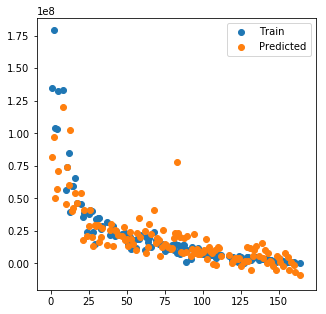

8810788.1728558727

In [808]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

hb=HuberRegressor(max_iter=100,alpha=0.0006)
hb.fit(X_train,y_train)
# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=train_index
# movie_id
train_open_gross=y_train
train_predicted_open_gross=list(hb.predict(X_train))
plt.scatter(movie_id,train_open_gross,label="Train")
# plt.show()
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(train_open_gross, train_predicted_open_gross)

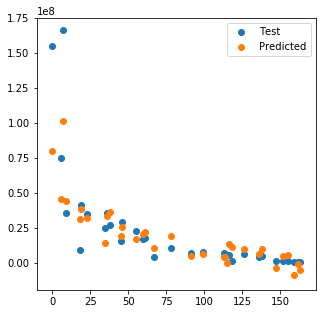

10166027.106651077

In [809]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=test_index
# movie_id
test_open_gross=y_test
test_predicted_open_gross=list(hb.predict(X_test))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(test_open_gross, test_predicted_open_gross)

## LASSO

In [812]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

alpha_list=np.linspace(0.01,0.1,10)
result = []
for each in alpha_list:
    la=Lasso(alpha=each, max_iter=100)
    scores = cross_val_score(hb, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
    mean = scores.mean()
    result.append([each, mean])
result

[[0.01, -9081260.3547630813],
 [0.020000000000000004, -9070786.4883733895],
 [0.030000000000000006, -9070576.5889647137],
 [0.040000000000000008, -9085211.8913452961],
 [0.05000000000000001, -9070786.4883733895],
 [0.060000000000000012, -9074528.1255469285],
 [0.070000000000000007, -9070576.5889647137],
 [0.080000000000000002, -9070576.5889647137],
 [0.090000000000000011, -9081260.3547630813],
 [0.10000000000000001, -9070786.4883733895]]

Look like when $\alpha=0.03,0.07,0.08$, the cross_val score reaches maximum.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


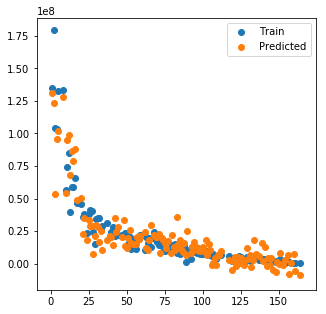

7180839.788001094

In [813]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

la=Lasso(max_iter=100,alpha=0.03)
la.fit(X_train,y_train)
# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=train_index
# movie_id
train_open_gross=y_train
train_predicted_open_gross=list(la.predict(X_train))
plt.scatter(movie_id,train_open_gross,label="Train")
# plt.show()
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(train_open_gross, train_predicted_open_gross)

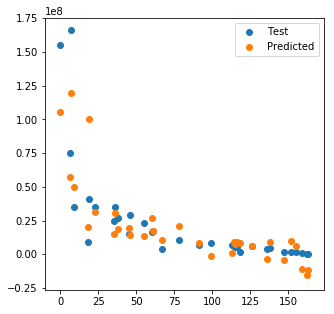

11622886.287929397

In [814]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=test_index
# movie_id
test_open_gross=y_test
test_predicted_open_gross=list(la.predict(X_test))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(test_open_gross, test_predicted_open_gross)

## Elastic Net

In [817]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

alpha_list=np.linspace(0.01,0.1,10)
result = []
for each in alpha_list:
    elas=ElasticNet(alpha=each, max_iter=100)
    scores = cross_val_score(elas, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
    mean = scores.mean()
    result.append([each, mean])
result

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[[0.01, -9381717.3593948185],
 [0.020000000000000004, -9174903.0430761259],
 [0.030000000000000006, -9142386.8922915701],
 [0.040000000000000008, -9157402.2548619546],
 [0.05000000000000001, -9183617.5863662809],
 [0.060000000000000012, -9216574.5852857288],
 [0.070000000000000007, -9273283.2557458542],
 [0.080000000000000002, -9323919.7811535206],
 [0.090000000000000011, -9365934.5078676622],
 [0.10000000000000001, -9402173.0482124053]]

Look like when $\alpha=0.03$, the cross_val score reaches maximum.

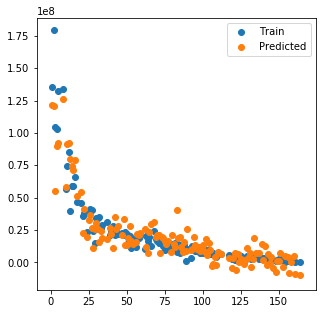

7587027.1611079806

In [818]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

elas=ElasticNet(max_iter=100,alpha=0.03)
elas.fit(X_train,y_train)
# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=train_index
# movie_id
train_open_gross=y_train
train_predicted_open_gross=list(elas.predict(X_train))
plt.scatter(movie_id,train_open_gross,label="Train")
# plt.show()
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(train_open_gross, train_predicted_open_gross)

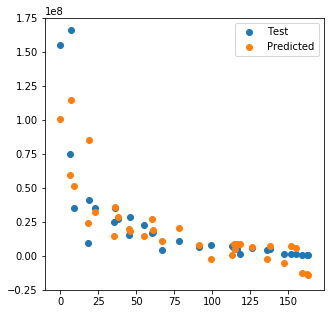

10950709.243126925

In [819]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=test_index
# movie_id
test_open_gross=y_test
test_predicted_open_gross=list(elas.predict(X_test))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(test_open_gross, test_predicted_open_gross)

## Ridge Regularization

In [820]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

alpha_list=np.linspace(0.1,1,10)
result = []
for each in alpha_list:
    ri=Ridge(alpha=each, max_iter=100)
    scores = cross_val_score(elas, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
    mean = scores.mean()
    result.append([each, mean])
result

[[0.10000000000000001, -9142386.8922915719],
 [0.20000000000000001, -9142386.8922915719],
 [0.30000000000000004, -9142386.8922915719],
 [0.40000000000000002, -9142386.8922915719],
 [0.5, -9142386.8922915719],
 [0.59999999999999998, -9142386.8922915719],
 [0.70000000000000007, -9142386.8922915719],
 [0.80000000000000004, -9142386.8922915719],
 [0.90000000000000002, -9142386.8922915719],
 [1.0, -9142386.8922915719]]

Look like when $\alpha=0.1,0.2,...1$, the cross_val score reaches maximum.

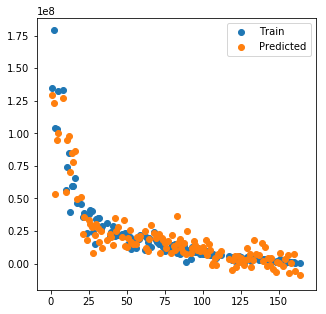

7199443.5382645773

In [821]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ri=Ridge(max_iter=100,alpha=0.2)
ri.fit(X_train,y_train)
# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=train_index
# movie_id
train_open_gross=y_train
train_predicted_open_gross=list(ri.predict(X_train))
plt.scatter(movie_id,train_open_gross,label="Train")
# plt.show()
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(train_open_gross, train_predicted_open_gross)

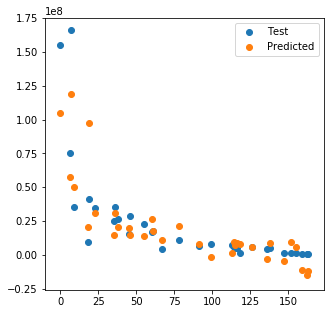

11486593.063644774

In [822]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=test_index
# movie_id
test_open_gross=y_test
test_predicted_open_gross=list(ri.predict(X_test))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(test_open_gross, test_predicted_open_gross)

# One-day ahead prediction

In [830]:
df_X['trend_a_week'] = df['trend_a_week']
df_X['trend_a_day'] = df['trend_a_day']
df_Xm_three=df_X.as_matrix(columns=None)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [831]:
from sklearn.model_selection import train_test_split
X=df_Xm_three
y=list(df['open_gross'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
test_index=[y.index(i) for i in y_test]
train_index=[y.index(i) for i in y_train]

## Huber

In [832]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import HuberRegressor

alpha_list=np.linspace(0.001,0.01,10)
result = []
for each in alpha_list:
    hb=HuberRegressor(alpha=each, max_iter=100)
    scores = cross_val_score(hb, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
    mean = scores.mean()
    result.append([each, mean])
result

[[0.001, -8253941.8013844918],
 [0.002, -8243174.1124178814],
 [0.0030000000000000001, -8292780.2272261605],
 [0.0040000000000000001, -8274993.4111294029],
 [0.0050000000000000001, -8252850.0842045601],
 [0.0060000000000000001, -8268883.6762378663],
 [0.0070000000000000001, -8245721.2533650296],
 [0.0080000000000000002, -8300214.3640931202],
 [0.0090000000000000011, -8385932.5507073803],
 [0.01, -8389400.5239221118]]

Look like when $\alpha=0.002$, the cross_val score reaches maximum.

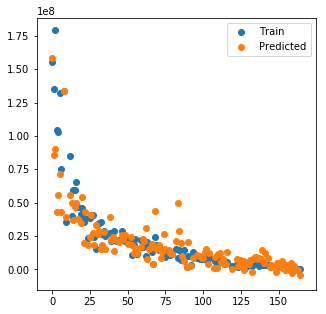

7843980.588695907

In [833]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

hb=HuberRegressor(max_iter=100,alpha=0.002)
hb.fit(X_train,y_train)
# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=train_index
# movie_id
train_open_gross=y_train
train_predicted_open_gross=list(hb.predict(X_train))
plt.scatter(movie_id,train_open_gross,label="Train")
# plt.show()
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(train_open_gross, train_predicted_open_gross)

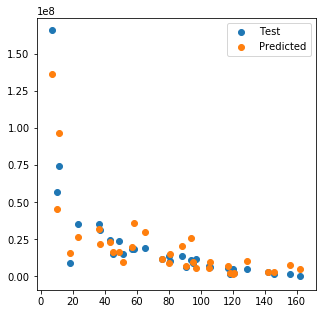

6107503.28065255

In [834]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=test_index
# movie_id
test_open_gross=y_test
test_predicted_open_gross=list(hb.predict(X_test))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(test_open_gross, test_predicted_open_gross)

## Lasso

In [836]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

alpha_list=np.linspace(0.1,1,10)
result = []
for each in alpha_list:
    la=Lasso(alpha=each, max_iter=100)
    scores = cross_val_score(la, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
    mean = scores.mean()
    result.append([each, mean])
result

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

[[0.10000000000000001, -10971461.911455024],
 [0.20000000000000001, -10971460.270229388],
 [0.30000000000000004, -10971458.629003745],
 [0.40000000000000002, -10971456.987778103],
 [0.5, -10971455.34655246],
 [0.59999999999999998, -10971453.705326816],
 [0.70000000000000007, -10971452.064101178],
 [0.80000000000000004, -10971450.422875535],
 [0.90000000000000002, -10971448.781649891],
 [1.0, -10971447.140424252]]

Look like when $\alpha=0.5$, the cross_val score reaches maximum.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


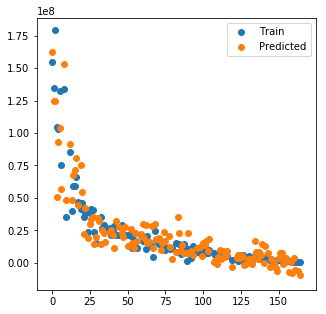

7056955.6252331473

In [837]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

la=Lasso(max_iter=100,alpha=0.5)
la.fit(X_train,y_train)
# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=train_index
# movie_id
train_open_gross=y_train
train_predicted_open_gross=list(la.predict(X_train))
plt.scatter(movie_id,train_open_gross,label="Train")
# plt.show()
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(train_open_gross, train_predicted_open_gross)

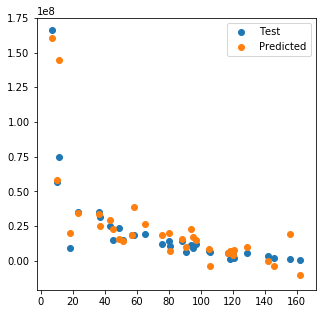

7758357.0498526804

In [838]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=test_index
# movie_id
test_open_gross=y_test
test_predicted_open_gross=list(la.predict(X_test))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(test_open_gross, test_predicted_open_gross)

## Elastic Net

In [839]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet

alpha_list=np.linspace(0.01,0.1,10)
result = []
for each in alpha_list:
    elas=ElasticNet(alpha=each, max_iter=100)
    scores = cross_val_score(elas, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
    mean = scores.mean()
    result.append([each, mean])
result

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/pyth

[[0.01, -10572507.435483368],
 [0.020000000000000004, -10385667.563600218],
 [0.030000000000000006, -10265206.887828503],
 [0.040000000000000008, -10190915.789155632],
 [0.05000000000000001, -10144051.229583625],
 [0.060000000000000012, -10110112.066925354],
 [0.070000000000000007, -10085302.689703131],
 [0.080000000000000002, -10062868.162886459],
 [0.090000000000000011, -10040636.175521512],
 [0.10000000000000001, -10018717.673749747]]

Look like when $\alpha=0.1$, the cross_val score reaches maximum.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


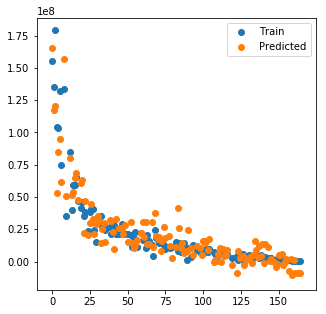

7641503.8874589009

In [840]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

elas=ElasticNet(max_iter=100,alpha=0.1)
elas.fit(X_train,y_train)
# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=train_index
# movie_id
train_open_gross=y_train
train_predicted_open_gross=list(elas.predict(X_train))
plt.scatter(movie_id,train_open_gross,label="Train")
# plt.show()
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(train_open_gross, train_predicted_open_gross)

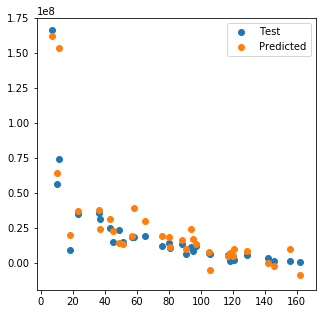

8089188.1149891596

In [841]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=test_index
# movie_id
test_open_gross=y_test
test_predicted_open_gross=list(elas.predict(X_test))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(test_open_gross, test_predicted_open_gross)

## Ridge

In [842]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

alpha_list=np.linspace(0.1,1,10)
result = []
for each in alpha_list:
    ri=Ridge(alpha=each, max_iter=100)
    scores = cross_val_score(ri, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
    mean = scores.mean()
    result.append([each, mean])
result

[[0.10000000000000001, -10897705.719356634],
 [0.20000000000000001, -10808132.642806903],
 [0.30000000000000004, -10736413.394557143],
 [0.40000000000000002, -10679287.468767596],
 [0.5, -10630192.677475501],
 [0.59999999999999998, -10586176.102409508],
 [0.70000000000000007, -10546225.630901303],
 [0.80000000000000004, -10509602.458520064],
 [0.90000000000000002, -10475750.978609104],
 [1.0, -10444243.071004162]]

Look like when $\alpha=1$, the cross_val score reaches maximum.

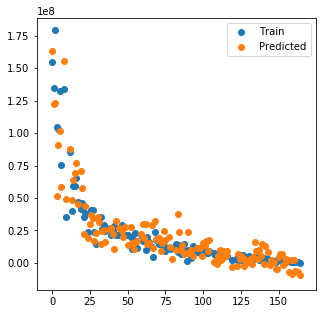

7180996.2133282302

In [843]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ri=Ridge(max_iter=100,alpha=1)
ri.fit(X_train,y_train)
# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=train_index
# movie_id
train_open_gross=y_train
train_predicted_open_gross=list(ri.predict(X_train))
plt.scatter(movie_id,train_open_gross,label="Train")
# plt.show()
plt.scatter(movie_id,train_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(train_open_gross, train_predicted_open_gross)

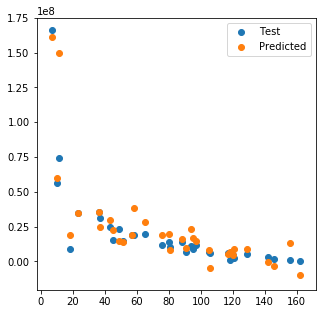

7652568.0275423685

In [844]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup the figure and axes
fig = plt.figure(figsize=(5, 5))
movie_id=test_index
# movie_id
test_open_gross=y_test
test_predicted_open_gross=list(ri.predict(X_test))
plt.scatter(movie_id,test_open_gross,label="Test")
# plt.show()
plt.scatter(movie_id,test_predicted_open_gross,label="Predicted")
plt.legend()
plt.show()
mean_absolute_error(test_open_gross, test_predicted_open_gross)